# Визуализация определения предела последовательности

Иллюстрация определения предела на примере:

$$\lim_{n \to \infty} \frac{2n + 1}{n} = 2$$


In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11


In [16]:
# Определяем последовательность
def a_n(n):
    """Последовательность a_n = (2n + 1) / n"""
    return (2 * n + 1) / n

# Предел последовательности
limit = 2

# Вычисляем элементы последовательности
n_values = np.arange(1, 51)
a_values = a_n(n_values)

print(f"Последовательность: a_n = (2n + 1) / n")
print(f"Предел: {limit}")
print(f"\nПервые 10 элементов:")
for i in range(10):
    print(f"a_{i+1} = {a_values[i]:.4f}, отклонение от предела: {abs(a_values[i] - limit):.4f}")


Последовательность: a_n = (2n + 1) / n
Предел: 2

Первые 10 элементов:
a_1 = 3.0000, отклонение от предела: 1.0000
a_2 = 2.5000, отклонение от предела: 0.5000
a_3 = 2.3333, отклонение от предела: 0.3333
a_4 = 2.2500, отклонение от предела: 0.2500
a_5 = 2.2000, отклонение от предела: 0.2000
a_6 = 2.1667, отклонение от предела: 0.1667
a_7 = 2.1429, отклонение от предела: 0.1429
a_8 = 2.1250, отклонение от предела: 0.1250
a_9 = 2.1111, отклонение от предела: 0.1111
a_10 = 2.1000, отклонение от предела: 0.1000


## График 1: Иллюстрация определения с ε и N

Для любого ε > 0 находим N такое, что при n > N все элементы попадают в ε-окрестность предела.


In [17]:
def plot_limit_illustration(epsilon, n_max=50):
    """
    Визуализация определения предела с заданным epsilon
    
    Parameters:
    -----------
    epsilon : float
        Радиус окрестности вокруг предела
    n_max : int
        Максимальный номер элемента для отображения
    """
    # Вычисляем N по формуле N = ⌈1/ε⌉
    N = int(np.ceil(1 / epsilon))
    
    # Вычисляем элементы последовательности
    n_values = np.arange(1, n_max + 1)
    a_values = a_n(n_values)
    
    # Создаём график
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Рисуем элементы последовательности ДО N (красные)
    mask_before = n_values <= N
    ax.scatter(n_values[mask_before], a_values[mask_before], 
               color='red', s=50, alpha=0.7, label=rf'Элементы при $n \leq N={N}$', zorder=3)
    
    # Рисуем элементы последовательности ПОСЛЕ N (зелёные)
    mask_after = n_values > N
    ax.scatter(n_values[mask_after], a_values[mask_after], 
               color='green', s=50, alpha=0.7, label=rf'Элементы при $n > N={N}$', zorder=3)
    
    # Линия предела
    ax.axhline(y=limit, color='blue', linestyle='--', linewidth=2, label=rf'Предел $A = {limit}$')
    
    # ε-окрестность (горизонтальная полоса)
    ax.axhspan(limit - epsilon, limit + epsilon, alpha=0.2, color='blue', 
               label=rf'$\varepsilon$-окрестность: $({limit - epsilon:.3f}, {limit + epsilon:.3f})$')
    
    # Границы окрестности
    ax.axhline(y=limit + epsilon, color='blue', linestyle=':', linewidth=1, alpha=0.5)
    ax.axhline(y=limit - epsilon, color='blue', linestyle=':', linewidth=1, alpha=0.5)
    
    # Вертикальная линия N
    ax.axvline(x=N, color='orange', linestyle='--', linewidth=2, alpha=0.7, 
               label=rf'$N = \lceil 1/\varepsilon \rceil = {N}$')
    
    # Настройки графика
    ax.set_xlabel(r'$n$ (номер элемента)', fontsize=13, fontweight='bold')
    ax.set_ylabel(r'$a_n = \frac{2n + 1}{n}$', fontsize=13, fontweight='bold')
    ax.set_title(rf'Определение предела: $\varepsilon = {epsilon}$, $N = {N}$' + '\n' + 
                 rf'При $n > {N}$ все элементы в $\varepsilon$-окрестности предела',
                 fontsize=14, fontweight='bold')
    ax.legend(loc='upper right', fontsize=11)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, n_max)
    
    # Добавляем аннотации
    ax.text(N/2, limit + epsilon + 0.15, rf'$\varepsilon = {epsilon}$', 
            fontsize=12, ha='center', color='blue', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Проверка: все ли элементы после N попадают в окрестность?
    elements_after_N = a_values[mask_after]
    if len(elements_after_N) > 0:
        all_in_range = np.all(np.abs(elements_after_N - limit) < epsilon)
        print(f"✓ Проверка: при n > {N} все элементы в ε-окрестности: {all_in_range}")
        print(f"  Максимальное отклонение: {np.max(np.abs(elements_after_N - limit)):.6f} < ε = {epsilon}")


### Пример 1: ε = 0.2 (большая окрестность)


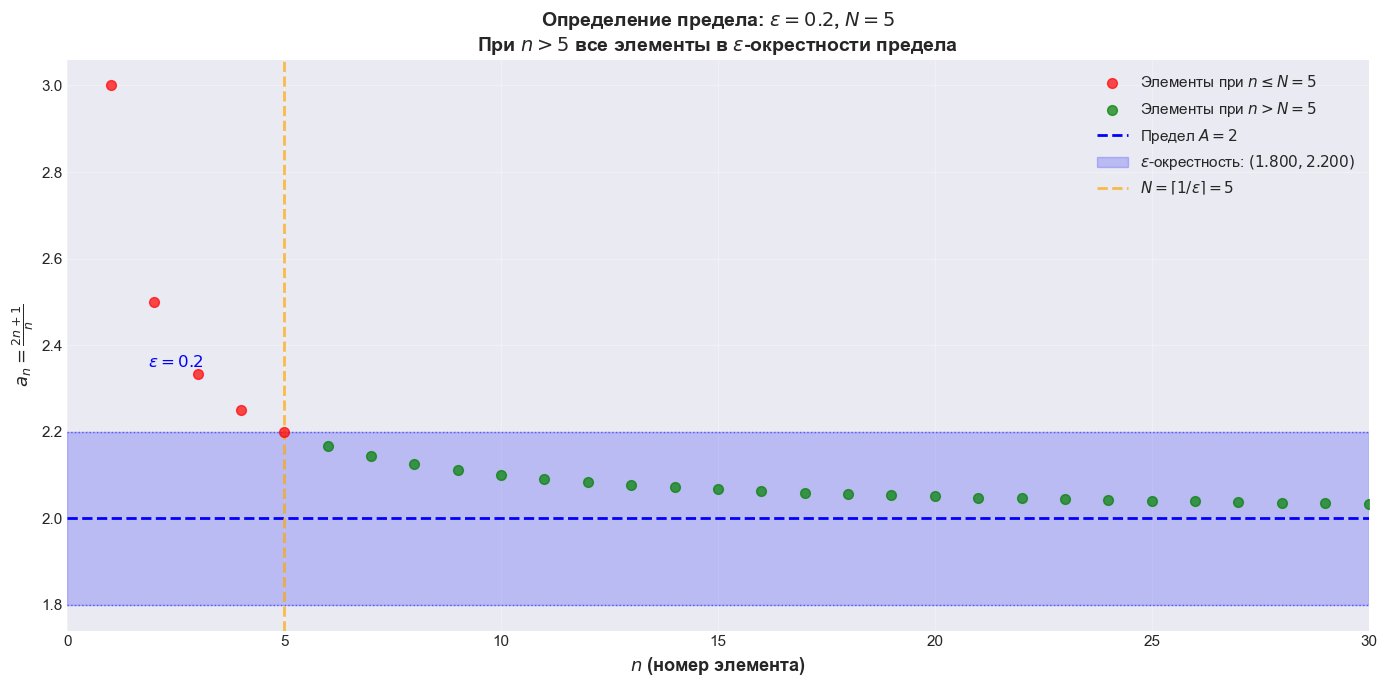

✓ Проверка: при n > 5 все элементы в ε-окрестности: True
  Максимальное отклонение: 0.166667 < ε = 0.2


In [18]:
plot_limit_illustration(epsilon=0.2, n_max=30)


### Пример 2: ε = 0.1 (средняя окрестность)


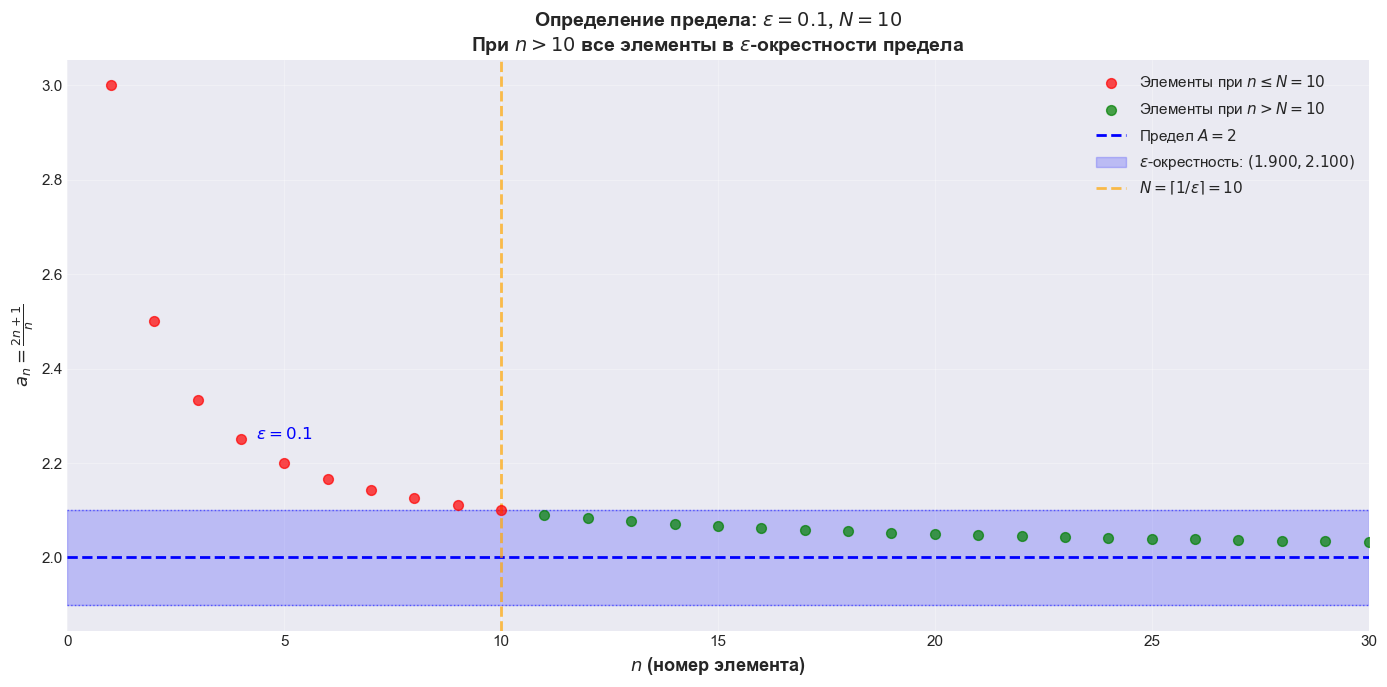

✓ Проверка: при n > 10 все элементы в ε-окрестности: True
  Максимальное отклонение: 0.090909 < ε = 0.1


In [19]:
plot_limit_illustration(epsilon=0.1, n_max=30)


### Пример 3: ε = 0.05 (маленькая окрестность)


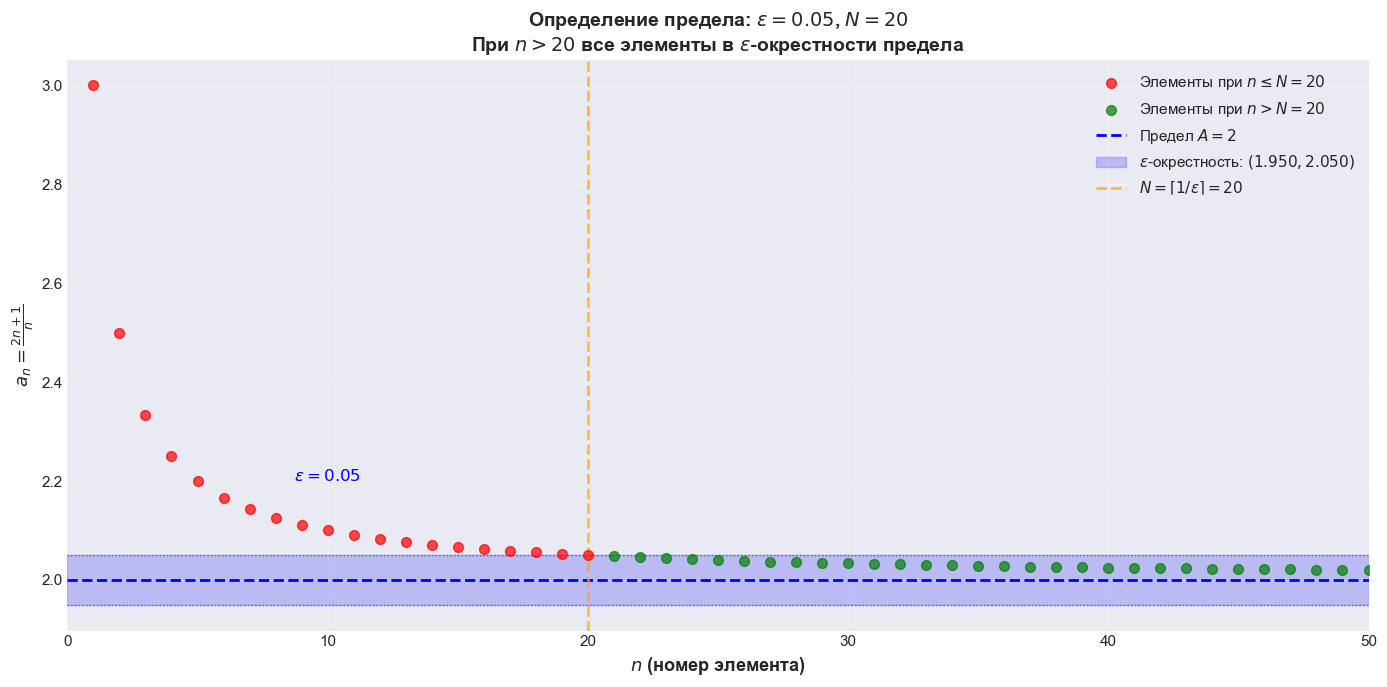

✓ Проверка: при n > 20 все элементы в ε-окрестности: True
  Максимальное отклонение: 0.047619 < ε = 0.05


In [20]:
plot_limit_illustration(epsilon=0.05, n_max=50)


## График 2: Сходимость последовательности к пределу

Показываем как последовательность приближается к пределу при увеличении n.


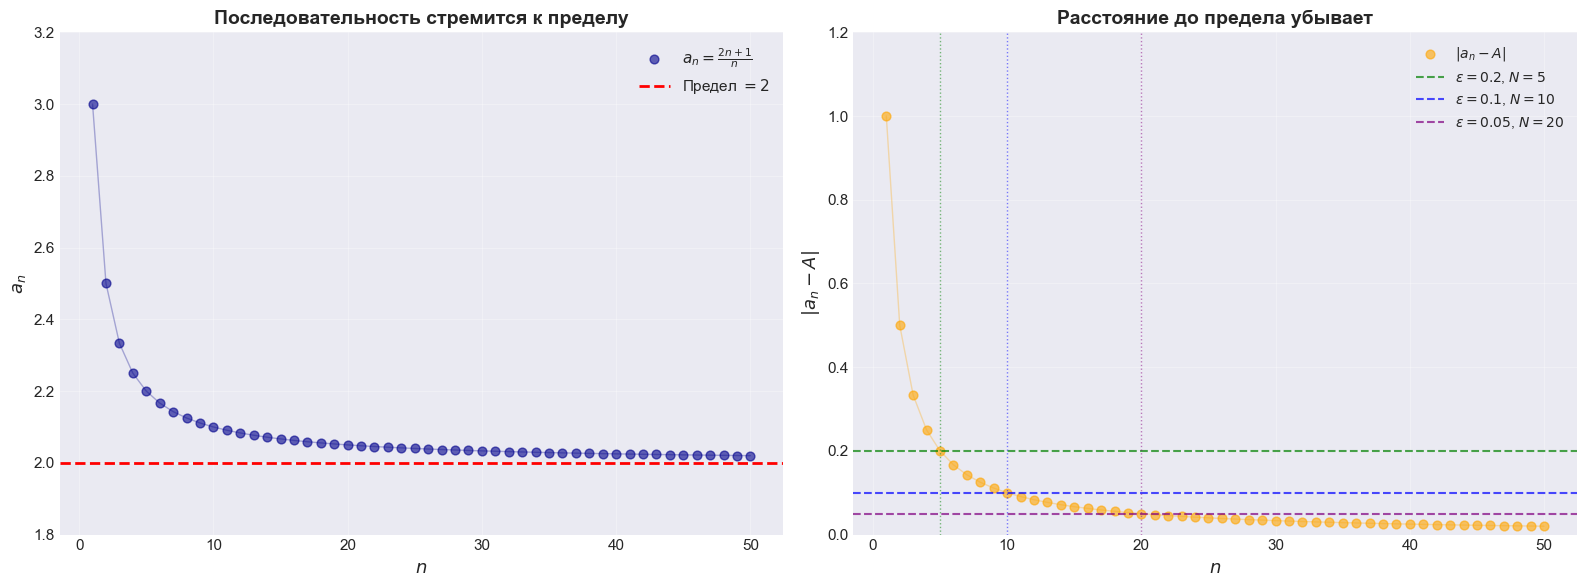

Видно, что:
1. Последовательность монотонно убывает и стремится к 2
2. Расстояние |aₙ - 2| = 1/n убывает к нулю
3. Для каждого ε можно найти N, после которого все элементы ближе ε к пределу


In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# График 1: Последовательность
n_values = np.arange(1, 51)
a_values = a_n(n_values)

ax1.scatter(n_values, a_values, color='darkblue', s=40, alpha=0.6, label=r'$a_n = \frac{2n+1}{n}$')
ax1.plot(n_values, a_values, color='darkblue', alpha=0.3, linewidth=1)
ax1.axhline(y=limit, color='red', linestyle='--', linewidth=2, label=rf'Предел $= {limit}$')
ax1.set_xlabel(r'$n$', fontsize=13, fontweight='bold')
ax1.set_ylabel(r'$a_n$', fontsize=13, fontweight='bold')
ax1.set_title('Последовательность стремится к пределу', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(1.8, 3.2)

# График 2: Расстояние до предела (отклонение)
deviations = np.abs(a_values - limit)

ax2.scatter(n_values, deviations, color='orange', s=40, alpha=0.6, label=r'$|a_n - A|$')
ax2.plot(n_values, deviations, color='orange', alpha=0.3, linewidth=1)

# Показываем для разных epsilon
epsilons = [0.2, 0.1, 0.05]
colors = ['green', 'blue', 'purple']
for eps, col in zip(epsilons, colors):
    N = int(np.ceil(1 / eps))
    ax2.axhline(y=eps, color=col, linestyle='--', linewidth=1.5, alpha=0.7, label=rf'$\varepsilon = {eps}$, $N = {N}$')
    ax2.axvline(x=N, color=col, linestyle=':', linewidth=1, alpha=0.5)

ax2.set_xlabel(r'$n$', fontsize=13, fontweight='bold')
ax2.set_ylabel(r'$|a_n - A|$', fontsize=13, fontweight='bold')
ax2.set_title('Расстояние до предела убывает', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 1.2)

plt.tight_layout()
plt.show()

print("Видно, что:")
print("1. Последовательность монотонно убывает и стремится к 2")
print("2. Расстояние |aₙ - 2| = 1/n убывает к нулю")
print("3. Для каждого ε можно найти N, после которого все элементы ближе ε к пределу")


## График 3: Зависимость N от ε

Показываем формулу N(ε) = ⌈1/ε⌉


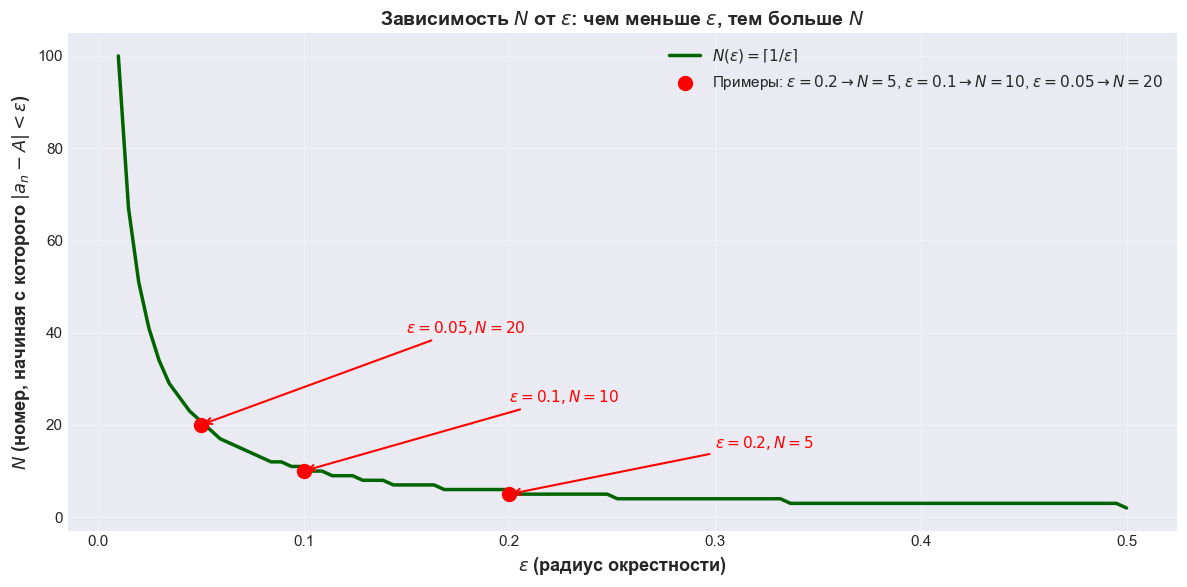


Ключевая идея:
• Формула N(ε) = ⌈1/ε⌉ работает для ЛЮБОГО ε > 0
• Чем меньше ε (уже окрестность), тем больше нужен N (дальше идти по последовательности)
• Это и есть суть определения: можем загнать последовательность в окрестность любой малости!


In [22]:
# Строим зависимость N от epsilon
epsilon_values = np.linspace(0.01, 0.5, 100)
N_values = np.ceil(1 / epsilon_values)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(epsilon_values, N_values, color='darkgreen', linewidth=2.5, label=r'$N(\varepsilon) = \lceil 1/\varepsilon \rceil$')
ax.scatter([0.2, 0.1, 0.05], [5, 10, 20], color='red', s=100, zorder=5, 
           label=r'Примеры: $\varepsilon=0.2 \to N=5$, $\varepsilon=0.1 \to N=10$, $\varepsilon=0.05 \to N=20$')

ax.set_xlabel(r'$\varepsilon$ (радиус окрестности)', fontsize=13, fontweight='bold')
ax.set_ylabel(r'$N$ (номер, начиная с которого $|a_n - A| < \varepsilon$)', fontsize=13, fontweight='bold')
ax.set_title(r'Зависимость $N$ от $\varepsilon$: чем меньше $\varepsilon$, тем больше $N$', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Аннотации
ax.annotate(r'$\varepsilon = 0.2, N = 5$', xy=(0.2, 5), xytext=(0.3, 15),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=11, color='red', fontweight='bold')
ax.annotate(r'$\varepsilon = 0.1, N = 10$', xy=(0.1, 10), xytext=(0.2, 25),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=11, color='red', fontweight='bold')
ax.annotate(r'$\varepsilon = 0.05, N = 20$', xy=(0.05, 20), xytext=(0.15, 40),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=11, color='red', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nКлючевая идея:")
print("• Формула N(ε) = ⌈1/ε⌉ работает для ЛЮБОГО ε > 0")
print("• Чем меньше ε (уже окрестность), тем больше нужен N (дальше идти по последовательности)")
print("• Это и есть суть определения: можем загнать последовательность в окрестность любой малости!")


## Выводы

### Что показывают графики:

1. **Определение предела** — для любого ε > 0 существует N такое, что при n > N все элементы последовательности попадают в ε-окрестность предела.

2. **Ключевая идея** — N зависит от ε по формуле N(ε) = ⌈1/ε⌉. Эта формула работает для **любого** ε > 0.

3. **Два процесса:**
   - **Вычисление предела:** используем алгебру → получаем A = 2
   - **Доказательство предела:** находим формулу N(ε) → показываем, что определение выполнено

4. **Геометрический смысл:**
   - **Синяя полоса** — ε-окрестность предела (по оси Y)
   - **Оранжевая линия** — номер N (по оси X)
   - **Красные точки** — элементы до N (могут быть вне окрестности)
   - **Зелёные точки** — элементы после N (все в окрестности!)

### Для нашего примера: aₙ = (2n + 1) / n

- Предел: **A = 2**
- Формула N: **N(ε) = ⌈1/ε⌉**
- Работает для любого ε! ✓


## Попробуйте сами!

Измените значение ε и посмотрите, как изменится N:


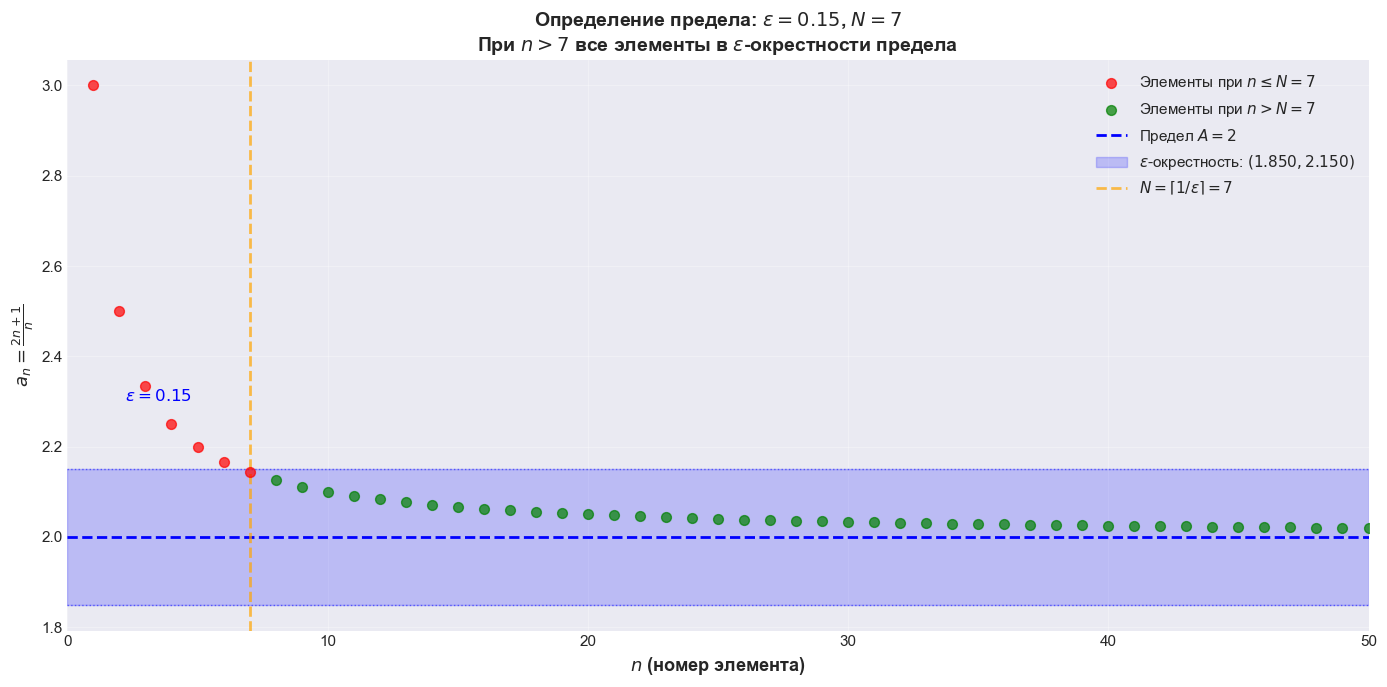

✓ Проверка: при n > 7 все элементы в ε-окрестности: True
  Максимальное отклонение: 0.125000 < ε = 0.15


In [23]:
# Попробуйте разные значения epsilon!
# Например: 0.3, 0.15, 0.02, 0.01

epsilon = 0.15  # <-- измените здесь!

plot_limit_illustration(epsilon=epsilon, n_max=50)
